<a href="https://colab.research.google.com/github/hoonzi-s/APC/blob/main/%231%20ALK%20-%20213BTMRVP%20Inferential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 임포트 및 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [19]:
data = pd.read_csv('alk rvp csv.csv', index_col = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2708 entries, 2014-09-16 to 2022-05-17
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RVP_LAB         2708 non-null   float64
 1   S.B5.213TI2804  2708 non-null   float64
 2   S.B5.213PI2806  2708 non-null   float64
dtypes: float64(3)
memory usage: 84.6+ KB


In [20]:
data.describe()

,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806
count,2708.000000,2708.000000,2708.000000
mean,39.308013,133.969684,335.047833
std,3.406074,3.452283,29.851255
min,28.500000,97.606803,291.821242
25%,37.400000,131.998333,318.077753
50%,39.000000,133.436735,325.511703
75%,40.700000,136.158762,338.359004
max,98.600000,145.939417,520.512731


In [21]:
data

,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806
2014-09-16,35.5,136.582564,335.836740
2014-09-17,33.5,138.822292,338.164993
2014-09-18,34.4,138.079717,339.017050
2014-09-19,34.3,137.367731,335.839848
2014-09-20,35.2,137.442057,349.710404
...,...,...,...
2022-05-13,43.7,127.127323,326.187806
2022-05-14,49.9,123.287827,321.014425
2022-05-15,48.7,125.099084,332.709037
2022-05-16,51.0,122.406470,325.956086


In [22]:
data.columns = ['RVP_LAB', 'TI2804', 'PI2806']
data = data[data['RVP_LAB'] < 70].sort_values(by = 'RVP_LAB')
data

,RVP_LAB,TI2804,PI2806
2015-07-09,28.5,138.416083,312.828676
2015-07-10,28.5,139.732698,317.068865
2019-11-13,28.8,141.019403,322.464405
2021-09-19,29.8,135.484870,331.948674
2020-07-27,29.8,144.009999,325.051752
...,...,...,...
2018-07-13,55.5,136.123107,480.993079
2019-08-09,57.8,133.326625,457.893074
2015-07-30,58.0,127.676712,390.946907
2019-07-30,58.0,140.224060,423.020322


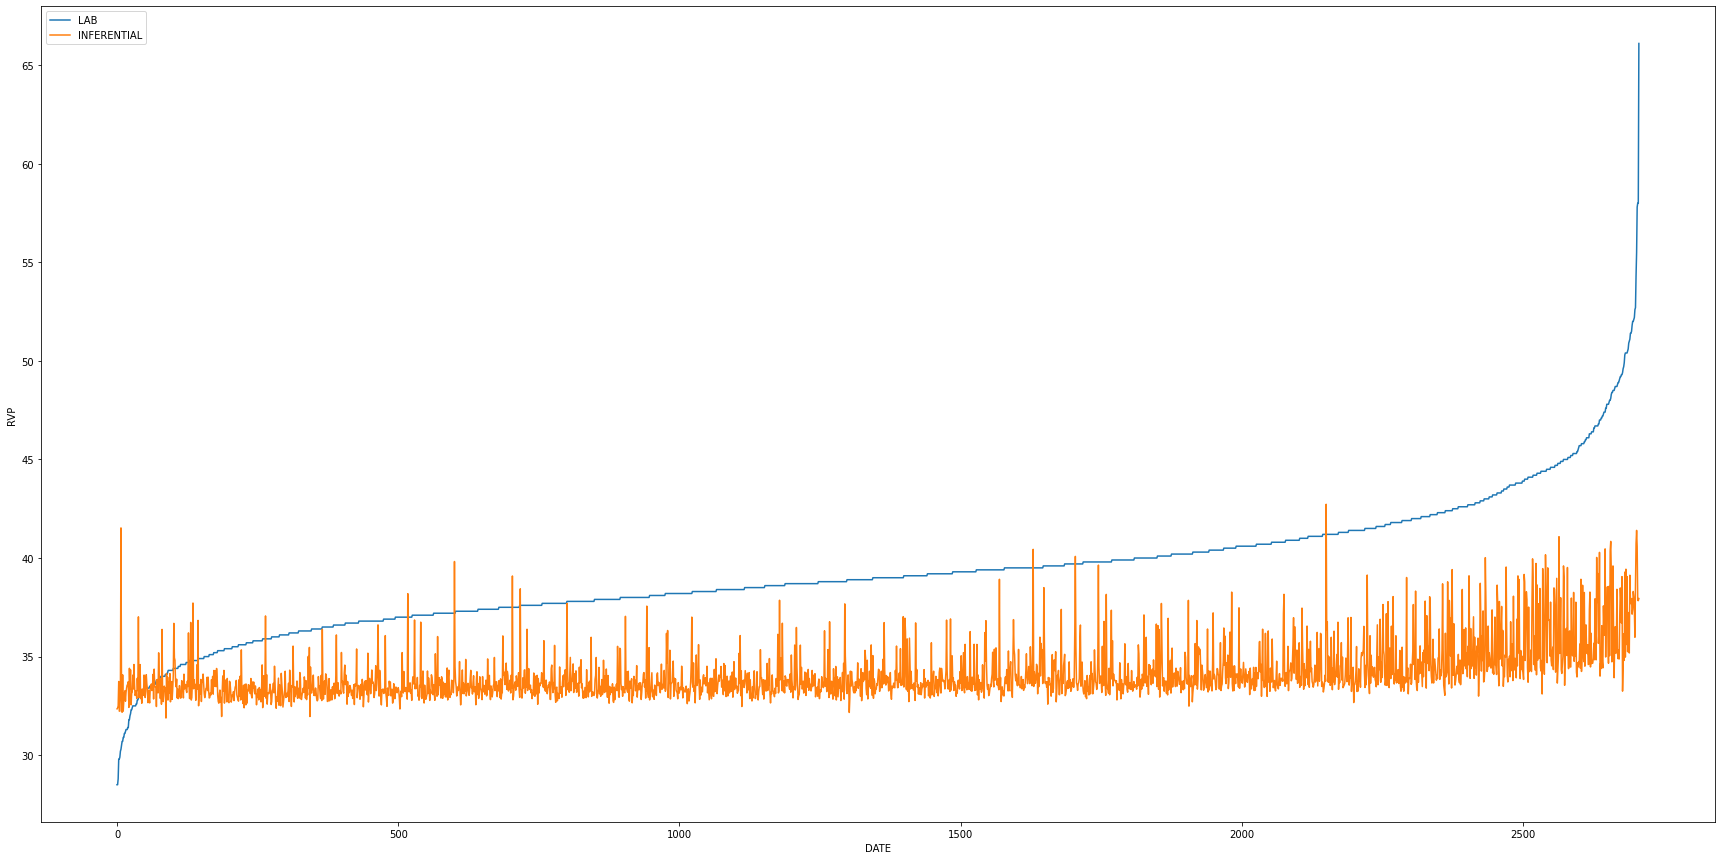

In [26]:
a1 = -0.1343
a2 = 0.0520
b = 34.671
inferential = a1 * data['TI2804'] + a2 * data['PI2806'] + b
length = data.shape[0]

plt.figure(figsize = (30, 15))
plt.plot(np.arange(length), data['RVP_LAB'], label = 'LAB')
plt.plot(np.arange(length), inferential, label = 'INFERENTIAL')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

In [27]:
input = data[['TI2804', 'PI2806']]
input

,TI2804,PI2806
2015-07-09,138.416083,312.828676
2015-07-10,139.732698,317.068865
2019-11-13,141.019403,322.464405
2021-09-19,135.484870,331.948674
2020-07-27,144.009999,325.051752
...,...,...
2018-07-13,136.123107,480.993079
2019-08-09,133.326625,457.893074
2015-07-30,127.676712,390.946907
2019-07-30,140.224060,423.020322


In [28]:
target = data[['RVP_LAB']]
target

,RVP_LAB
2015-07-09,28.5
2015-07-10,28.5
2019-11-13,28.8
2021-09-19,29.8
2020-07-27,29.8
...,...
2018-07-13,55.5
2019-08-09,57.8
2015-07-30,58.0
2019-07-30,58.0


In [29]:
train_input, test_input, train_target, test_target = tts(input, target, test_size = 0.2)

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
print(lr.coef_)
print(lr.intercept_)

0.4628871557613491
0.4444338094200523
[[-0.57308328  0.08299095]]
[88.28218911]


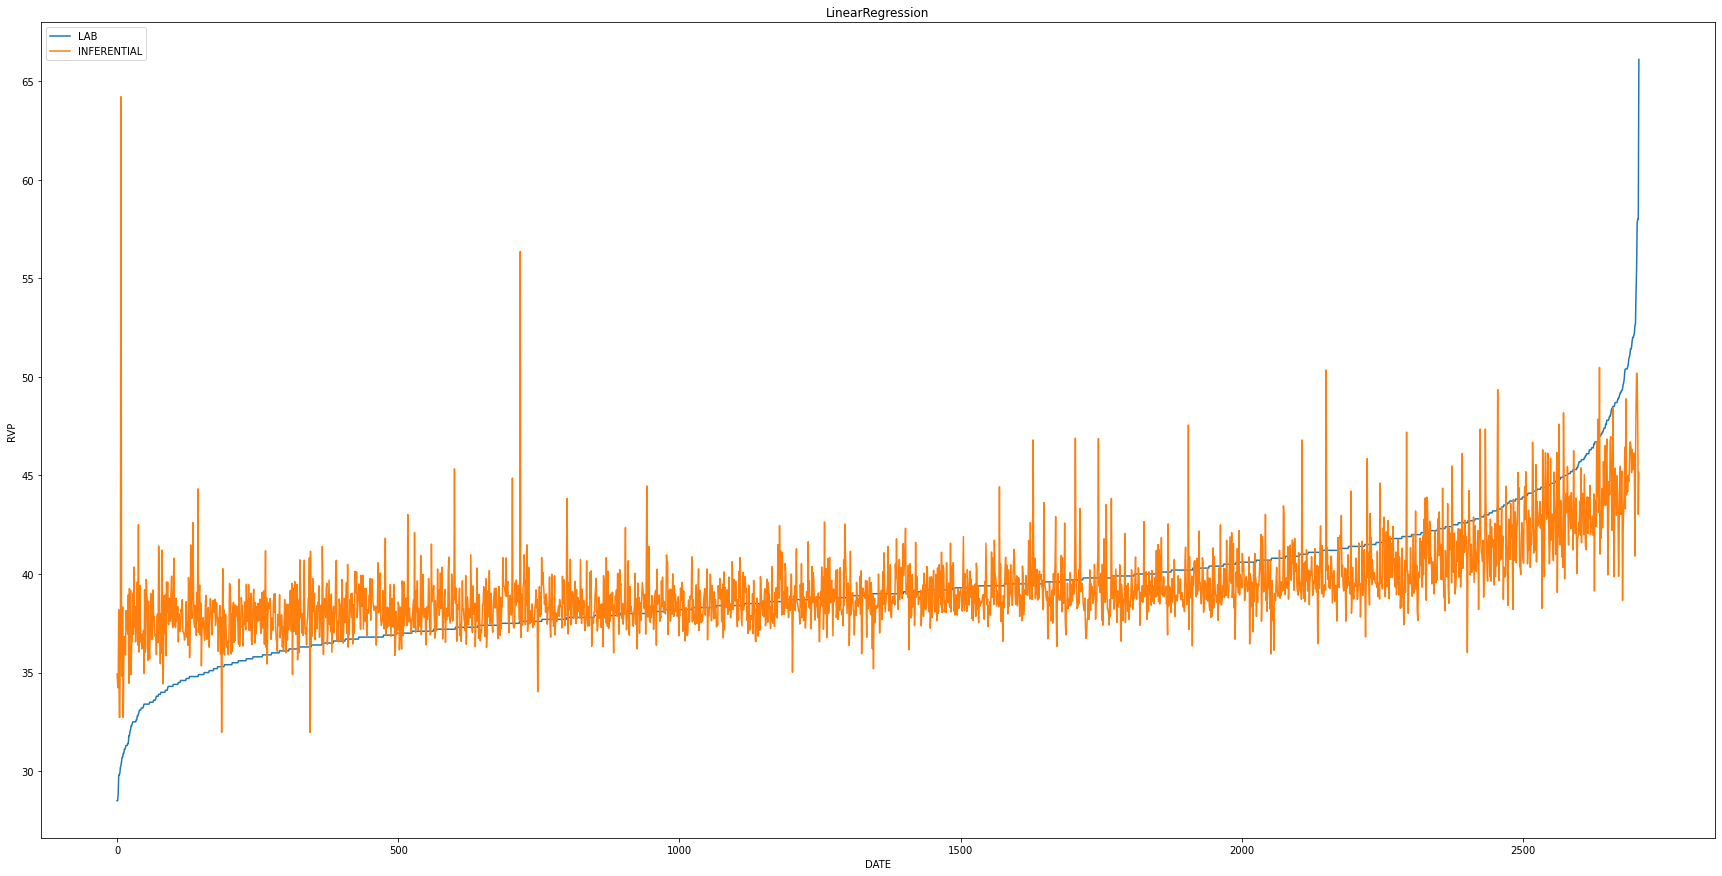

In [32]:
a1 = lr.coef_[0][0]
a2 = lr.coef_[0][1]
b = lr.intercept_
result = a1 * input['TI2804'] + a2 * input['PI2806'] + b

plt.figure(figsize = (30, 15))
plt.plot(np.arange(length), data['RVP_LAB'], label = 'LAB')
plt.plot(np.arange(length), result, label = 'INFERENTIAL')
plt.title('LinearRegression')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

In [33]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr_ss = LinearRegression()
lr_ss.fit(train_scaled, train_target)
print(lr_ss.score(train_scaled, train_target))
print(lr_ss.score(test_scaled, test_target))
print(lr_ss.coef_)
print(lr_ss.intercept_)

0.4628871557613492
0.4444338094200522
[[-1.98080657  2.48520496]]
[39.32997691]


In [38]:
a1 = lr_ss.coef_[0][0]
a2 = lr_ss.coef_[0][1]
b = lr_ss.intercept_
result_scaled = a1 * input['TI2804'] + a2 * input['PI2806'] + b
data_scaled = ss.transform(data.iloc[1:3])

plt.figure(figsize = (30, 15))
plt.plot(np.arange(length), data['RVP_LAB'], label = 'LAB')
plt.plot(np.arange(length), result, label = 'INFERENTIAL')
plt.title('LinearRegression with StandardScaler')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- RVP_LAB
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
mm = MinMaxScaler()
mm.fit(train_input)
train_scaled = mm.transform(train_input)
test_scaled = mm.transform(test_input)

lr_mm = LinearRegression()
lr_mm.fit(train_scaled, train_target)
print(lr_mm.score(train_scaled, train_target))
print(lr_mm.score(test_scaled, test_target))
print(lr_mm.coef_)
print(lr_mm.intercept_)

0.45490658193810174
0.5516532907909586
[[-22.35577956  17.05750234]]
[51.75923943]


In [ ]:
a1 = lr.coef_[0][0]
a2 = lr.coef_[0][1]
b = lr.intercept_

result = a1 * train_input['TI2804'] + a2 * train_input['PI2806'] + b
result.sort_index()

2014-09-16    37.077998
2014-09-18    37.044378
2014-09-19    36.958002
2014-09-20    37.852996
2014-09-21    38.070030
                ...    
2022-05-12    37.947684
2022-05-13    42.031308
2022-05-14    44.107130
2022-05-15    44.289220
2022-05-16    45.532142
Length: 2164, dtype: float64

In [ ]:
data

,RVP_LAB,TI2804,PI2806
2014-09-16,35.5,137.368850,332.370196
2014-09-17,33.5,138.363550,342.267734
2014-09-18,34.4,138.571868,339.821023
2014-09-19,34.3,137.795705,333.793957
2014-09-20,35.2,137.670243,343.080718
...,...,...,...
2022-05-13,43.7,127.476079,323.895694
2022-05-14,49.9,123.268204,319.940443
2022-05-15,48.7,124.538121,330.261808
2022-05-16,51.0,121.942983,327.401312


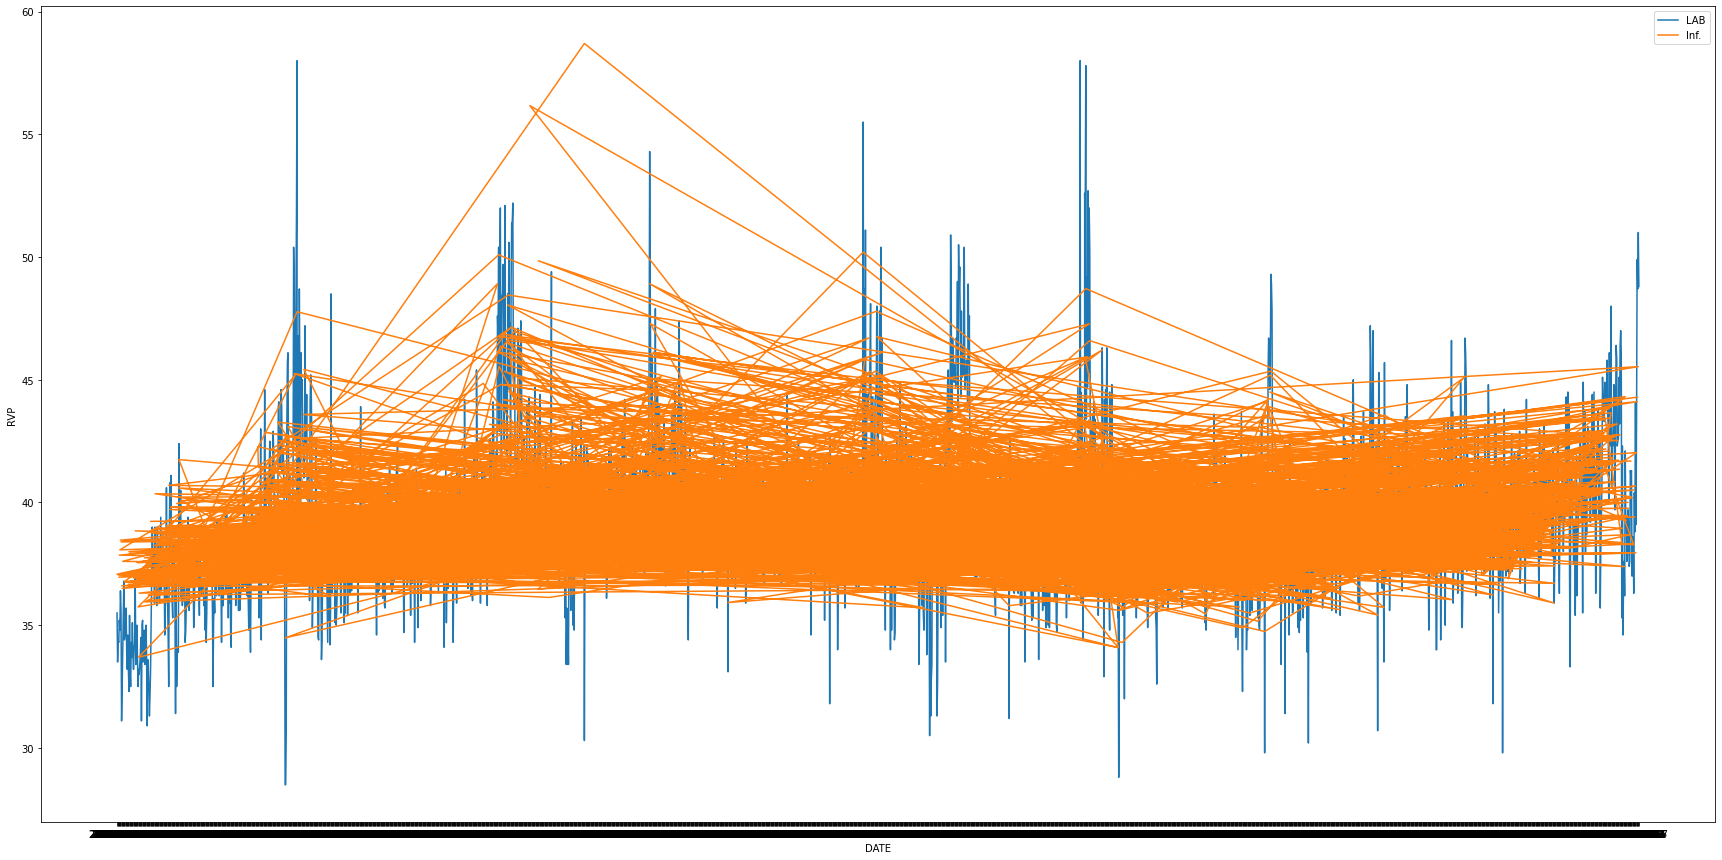

In [ ]:
plt.figure(figsize = (30, 15))
plt.plot(data['RVP_LAB'], label = 'LAB')
plt.plot(result, label = 'Inf.')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

In [ ]:
train_input_with_date.sort_index()

,DATE,TI2804,PI2806
0,2014-09-16,137.368850,332.370196
1,2014-09-17,138.363550,342.267734
2,2014-09-18,138.571868,339.821023
3,2014-09-19,137.795705,333.793957
4,2014-09-20,137.670243,343.080718
...,...,...,...
2625,2022-02-24,128.563951,330.977679
2626,2022-02-25,129.419033,319.675153
2627,2022-02-26,128.297302,323.319369
2628,2022-02-27,126.842403,328.328110


In [ ]:
test_input_with_date

,DATE,TI2804,PI2806
1989,2020-06-01,133.814591,323.861023
1580,2019-03-21,133.720352,327.538269
1634,2019-05-14,136.740265,334.737457
1555,2019-02-24,133.750427,315.113342
2230,2021-01-26,131.857605,323.118378
...,...,...,...
2112,2020-09-30,137.672119,341.812988
1662,2019-06-11,133.121124,323.577728
1240,2018-04-15,133.259674,339.147919
858,2017-03-24,133.008194,319.217682
